# Árvores de Decisão e Ensembles

In [2]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

import utils

In [4]:
np.random.seed(42)

plt.rcParams['figure.figsize'] = (8.0, 5.0)

## Usando Árvores de Decisão

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

In [6]:
x, y = utils.load_dataset('playing')
x

,Outlook,Humidity,Wind
0,sunny,high,strong
1,sunny,high,weak
2,overcast,high,weak
3,rain,high,weak
4,rain,normal,weak
5,rain,normal,strong
6,overcast,normal,strong
7,sunny,high,weak
8,sunny,normal,weak
9,rain,normal,weak


### One-hot encoding
Infelizmente a implementação do SKLearn não suporta atributos categóricos, então temos que usar alguma técnica para codificar os atributos para valores contínuos.

In [7]:
xc = pd.get_dummies(x, prefix_sep='=')
xc

,Outlook=overcast,Outlook=rain,Outlook=sunny,Humidity=high,Humidity=normal,Wind=strong,Wind=weak
0,0,0,1,1,0,1,0
1,0,0,1,1,0,0,1
2,1,0,0,1,0,0,1
3,0,1,0,1,0,0,1
4,0,1,0,0,1,0,1
5,0,1,0,0,1,1,0
6,1,0,0,0,1,1,0
7,0,0,1,1,0,0,1
8,0,0,1,0,1,0,1
9,0,1,0,0,1,0,1


In [8]:
dt = DecisionTreeClassifier()
dt.fit(xc, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

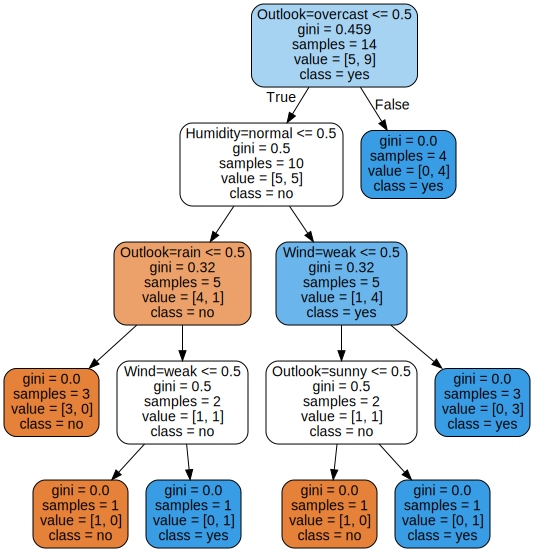

In [9]:
dot_data = export_graphviz(dt, 
                           out_file=None, 
                           feature_names=xc.columns,
                           class_names=['no', 'yes'],  
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

## Entropia

In [10]:
import scipy.stats as stats
from collections import Counter

Vamos implementar a entropia de Shannon. Considere que o argumento `v` são os valores das classes ex: `[0,1,1,1,0]`.

In [11]:
def entropy(v):
    return stats.entropy(np.array(list(Counter(v).values()))/len(v), base=2)

In [12]:
?

## Entropia esperada de um split

Agora vamos implementar a entropia esperada. Dessa vez considere que o argumento é uma lista de subconjuntos após um split ex: `[[0,1], [1,0,1,1]]`

In [13]:
def expected_entropy(split):
    n = float(sum(list(map(len, split))))
    return sum([(len(s)/n) * entropy(s) for s in split])

In [14]:
print(expected_entropy([[0,1], [1,0,1,1]]))
print(expected_entropy([[0,0,1,1], [1], [0,1,1]]))

0.874185416306
0.84436093777


## Ganho de Informação

In [15]:
def information_gain(s, h):
    return h - expected_entropy(s)

In [16]:
c1 = [0,1,1,0,1,1]
s11 = [[0,0,1], [1,1,1]]
s12 = [[1,0,1], [0,1,1]]

c2 = [0,1,0,0,0,1]
s2 = [[0,1],[0,0,0,1]]

print(information_gain(s11, entropy(c1)))
print(information_gain(s12, entropy(c1)))
print(information_gain(s2, entropy(c2)))

0.459147917027
0.0
0.0441104177484


## Exercício: Cancer de mama

Nesse exemplo vocês vão treinar uma árvore de decisão para classificar se um tumor é benigno ou maligno. O que deve ser feito:

* Liste os atributos do problema.
* Observe se algum atributo precisa de one-hot e aplique caso necessário.
* Calcule a média, desvio padrão, minimo e máximo de cada atributo (dica, pandas tem um método muito conveniente para isso).
* Observe se o problema é balanceado (o que é isso mesmo? e por que isso é relevante?)
* Separe um conjunto de teste e um de treino (quanto pra cada?)
* Escolha uma métrica de avaliação e avalie o classificador no conjunto de treino e teste.
* Plote a árvore treinada.

In [15]:
?

In [17]:
x, y, target_names = utils.load_dataset('cancer')

In [18]:
y.value_counts()

1    357
0    212
dtype: int64

In [19]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
x_describe = x.describe().T
x_describe['distance'] = (x_describe['50%']-x_describe['mean'])/(x_describe['max'] - x_describe['min'])*100
x_describe

,count,mean,std,min,25%,50%,75%,max,distance
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,-3.584134
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,-1.520624
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,-3.958975
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,-4.402507
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,-0.442612
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,-3.592106
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,-6.386906
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,-7.663591
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,-0.990840
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,-2.648715


In [21]:
x.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [22]:
import seaborn as sns

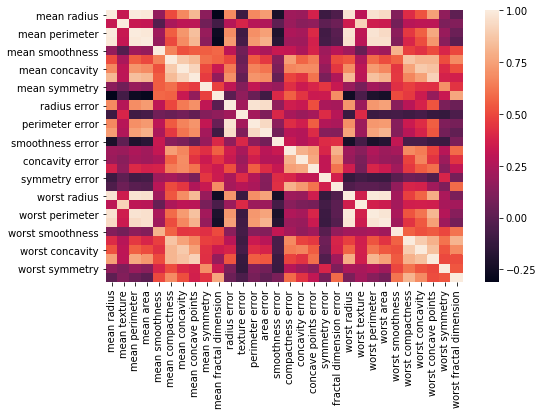

In [23]:
sns.heatmap(x.corr())

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.5, random_state=101)

In [25]:
model_cancer = DecisionTreeClassifier()
model_cancer.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
model_cancer.score(X_train, Y_train)

1.0

In [27]:
model_cancer.score(X_test, Y_test)

0.91228070175438591

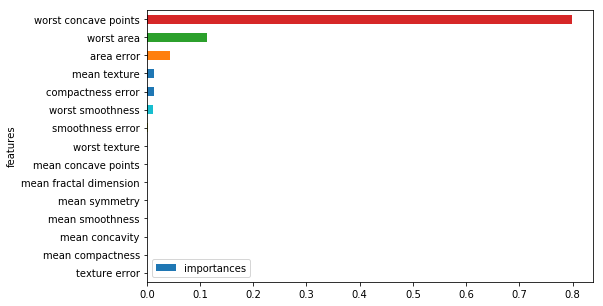

In [28]:
imps = pd.DataFrame({'importances' : model_cancer.feature_importances_, 'features':x.columns}).sort_values('importances')[15:]
imps.plot(x='features',y='importances',kind='barh')
new_columns = imps.head(6)['features'].tolist()

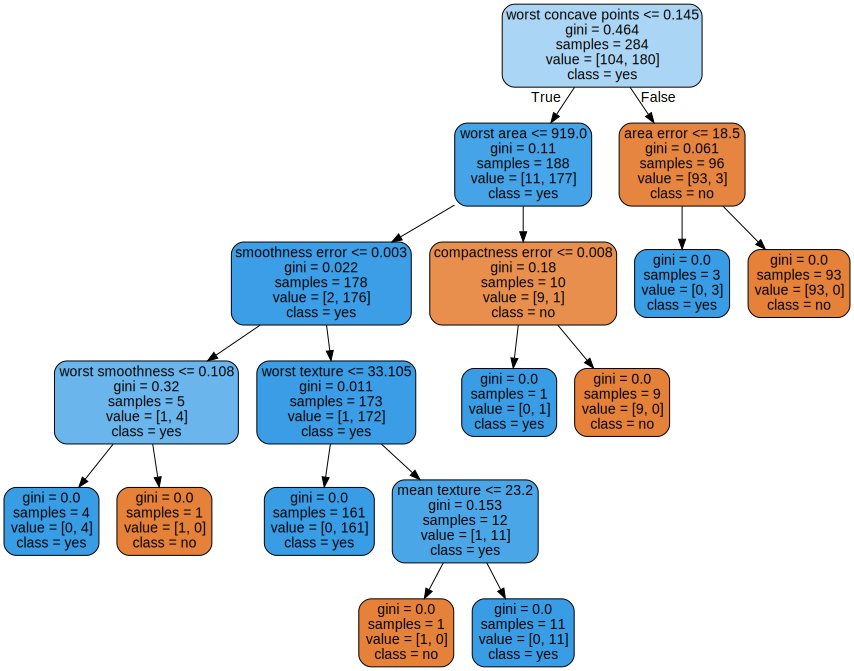

In [29]:
dot_data = export_graphviz(model_cancer, 
                           out_file=None, 
                           feature_names=x.columns,
                           class_names=['no', 'yes'],  
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

## Overfitting e Underfitting

### Exercício

Usando os dados acima de cancer de mama, você deve:

* Treinar vários modelos variando o valor do parâmetro `max_depth` entre 1 e 10
* Plotar um gráfico com duas curvas, max_depth vs acurácia no conjunto de treino, max_depth vs acurácia no conjunto de teste.

Dicas: para os plots, você pode usar 
```
plt.plot(depths, accs_train, label='train')
plt.plot(depths, accs_test, label='test')
plt.legend()```


In [30]:
DecisionTreeClassifier?

,accs_test,values
2,0.929825,3
4,0.926316,5
5,0.926316,6
6,0.926316,7
7,0.926316,8


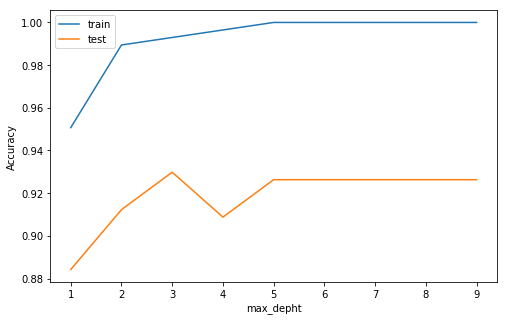

In [31]:
def plot_accs(values, accs_train, accs_test, param_name):
    plt.plot(values, accs_train, label='train')
    plt.plot(values, accs_test, label='test')
    plt.ylabel('Accuracy')
    plt.xlabel(param_name)
    plt.legend()


values = list(range(1, 10))
accs_train = []
accs_test = []
nodes = []
for value in values:
    model = DecisionTreeClassifier(max_depth=value,random_state=87)
    model.fit(X_train, Y_train)
    accs_train.append(accuracy_score(model.predict(X_train), Y_train))
    accs_test.append(accuracy_score(model.predict(X_test), Y_test))
    nodes.append(model.tree_.node_count)

plot_accs(values, accs_train, accs_test, param_name='max_depht')
score_test = pd.DataFrame({'values':values,'accs_test':accs_test}).sort_values(by=['accs_test'], ascending=False)
score_test.head()

Podemos perceber que o desempenho no conjunto de teste cai a medida que o modelo fica mais complexo tentando se adequar ao conjunto de treino (valores maiores de `max_depth`)

## Melhores parâmetros

In [32]:
dt = DecisionTreeClassifier(max_depth=3, random_state=87)
dt.fit(X_train, Y_train)

print('Acurácia no treino:', accuracy_score(Y_train, dt.predict(X_train)))
print('Acurácia no test:', accuracy_score(Y_test, dt.predict(X_test)))

Acurácia no treino: 0.992957746479
Acurácia no test: 0.929824561404


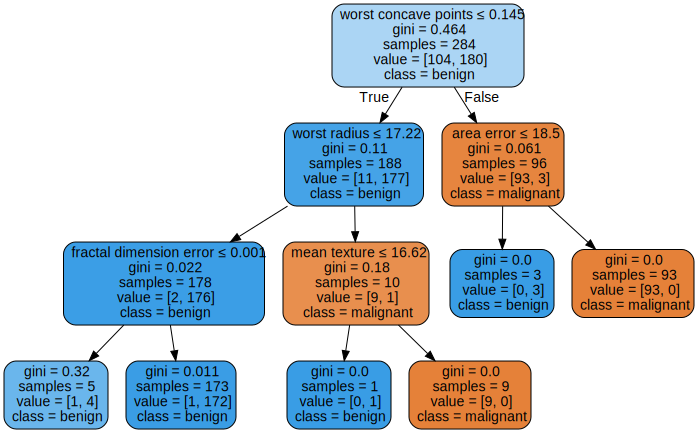

In [33]:
dot_data = export_graphviz(dt, 
                           out_file=None, 
                           feature_names=X_train.columns,
                           class_names=target_names,
                           filled=True, rounded=True, 
                           special_characters=True)
graphviz.Source(dot_data)

## Análise e Exploração

In [34]:
x, y = utils.load_dataset('fraud')

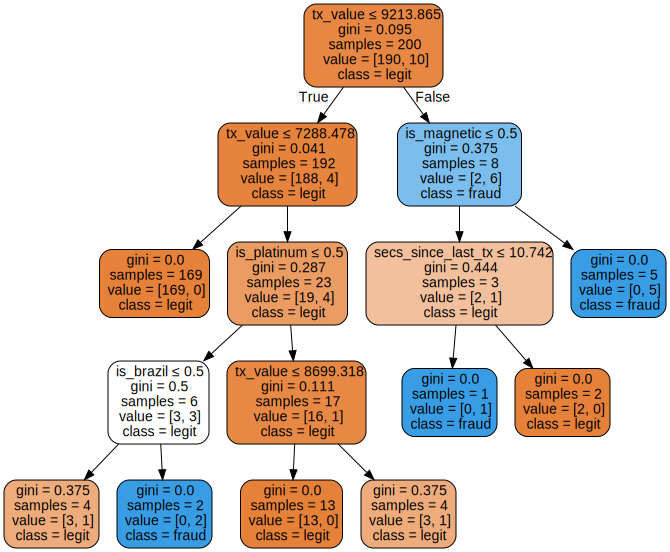

In [35]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(x, y)

dot_data = export_graphviz(dt, out_file=None,
                           feature_names=x.columns,
                           class_names=['legit', 'fraud'],  
                           filled=True, 
                           rounded=True,  
                           special_characters=True)
graphviz.Source(dot_data)

## Ensembling

Nesse exercício vamos observar problemas de overfitting e underfitting e tentar criar ensembles simples parar mitigar tais problemas. Vocês devem:

* Plotar os dados e observar a correlação entre x e y
* Utilizar `DecisionTreeRegressor` para treinar e visualizar um regressor nesses dados
* Experimentar com alguns parâmetros diferentes e observar os efeitos nos modelos
* Iterar N vezes para treinar N modelos diferentes com diferentes amostras dos dados
* Combinar os resultados de todos os modelos e observar o resultado

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from tqdm import tqdm

x, y = utils.load_dataset('regression')

  0%|          | 0/10000 [00:00<?, ?it/s]/home/rodrigo/anaconda3/envs/tera-fev2018/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
100%|██████████| 10000/10000 [00:02<00:00, 3684.59it/s]


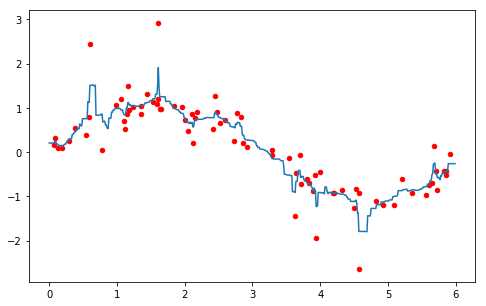

In [38]:
xtest = np.arange(0.0, 6.0, 0.01)[:, np.newaxis]

plt.scatter(x, y, s=20, color="red")

N = 10000
ypreds = []
for i in tqdm(range(N)):
    
    sx, _, sy, _ = train_test_split(x,y, train_size=0.5)
    dt = DecisionTreeRegressor(max_depth=6)
    dt.fit(sx, sy)
    ypred = dt.predict(xtest)
    
    #plt.plot(xtest, ypred, lw=1.5, label='model_{}'.format(N))
    
    ypreds.append(ypred)
    
final_pred = np.array(ypreds).mean(axis=0)

plt.plot(xtest, final_pred, lw=1.5,label='bag')

## Florestas Aleatórias

Nesse exercício vocês vão experimentar com alguns modelos de florestas aleatórias. Vocês devem:

* Treinar uma árvore de decisão e uma regressão logística para propósitos de comparação.
* Treinar uma floresta aleatória utilizando a classe `RandomForestClassifier` do sklearn.
* Medir a acurácia em todos modelos utilizando cross-validation com 5 folds.
* Realizar experimentos variando o número de estimadores (de 1 até 50) da floresta aleatória e observar o desempenho.
* Plote um gráfico `#estimadores x acurácia`


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [42]:
x, y, target_names = utils.load_dataset('cancer')

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=100, random_state=42)

In [21]:
n_estimators = list(range(1,51,1))
accs = []
???


plt.plot(n_estimators, accs)
plt.ylim((0.9,1.0))

## Bagging

Nesse exercício vocês devem:
* Carregar e inspecionar rapidamente o novo dataset
* Utilizar `BaggingClassifier` do sklearn para experimentar com diferentes quantidades de estimadores
* Utilizar `RandomForest` do sklearn para experimentar com diferentes quantidades de estimadores
* Plotar ambos resultados em um gráfico `#estimadores x ROC AUC`
* Notem que estamos usando uma métrica diferente para esse problema, que diferente da acurácia, precisa das probabilidades das classes e não somente a decisão final

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

np.random.seed(seed=2)

In [44]:
x, y = utils.load_dataset('default')

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [48]:
from sklearn.metrics import roc_auc_score

n_estimators = [1,2,3,4,5,10,15,20,25,30,40]
bag_scores = []
rf_scores = []
scores = []
for ne in tqdm(n_estimators):
    rf = RandomForestClassifier(n_estimators=ne)
    bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=ne)
    
    bag.fit(xtrain, ytrain)
    rf.fit(xtrain, ytrain)
    
    bag_ypred = bag.predict_proba(xtest)[:,1]
    rf_ypred = rf.predict_proba(xtest)[:,1]

    bag_score = roc_auc_score(ytest, bag_ypred)
    rf_score = roc_auc_score(ytest, rf_ypred)

    bag_scores.append(bag_score)
    rf_scores.append(rf_score)
    
    #print(ne, bag_score, rf_score)
    scores.append([ne, bag_score, rf_score])

100%|██████████| 11/11 [01:37<00:00,  8.83s/it]

[[1, 0.6149805709025562, 0.60813691031461314], [2, 0.67732967079631612, 0.67094648089408493], [3, 0.70667424378962596, 0.69961590718337474], [4, 0.71992957111174904, 0.72615957867126002], [5, 0.7372522205451576, 0.73721508246676837], [10, 0.78011480750252593, 0.77774150464989178], [15, 0.79326811371711703, 0.79870321610905748], [20, 0.80379527365213999, 0.80785300694563089], [25, 0.81118542249211811, 0.81372582125778292], [30, 0.81633142398445135, 0.82074476934881568], [40, 0.82220450052141647, 0.82716173537250315]]


In [50]:
pd.DataFrame(scores, columns=['ne', 'bag_score', 'rf_score'])

,ne,bag_score,rf_score
0,1,0.614981,0.608137
1,2,0.677330,0.670946
2,3,0.706674,0.699616
3,4,0.719930,0.726160
4,5,0.737252,0.737215
5,10,0.780115,0.777742
6,15,0.793268,0.798703
7,20,0.803795,0.807853
8,25,0.811185,0.813726
9,30,0.816331,0.820745


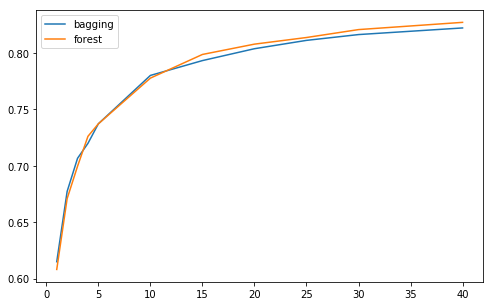

In [51]:
plt.plot(n_estimators, bag_scores, label='bagging')
plt.plot(n_estimators, rf_scores, label='forest')
plt.legend()

# FIM

## Material extra

O material abaixo não pode ser aprensetado em aula por falta de tempo, porém pode ser usado pelos alunos para aprender mais sobre o assunto.

## Limitações de Métodos lineares

Para entender a motivação por trás de árvores de decisão, vamos começar com um exemplo onde regressão logística (e outros métodos lineares) não funcionam muito bem.

In [13]:
x, y = utils.load_dataset('non-linear')

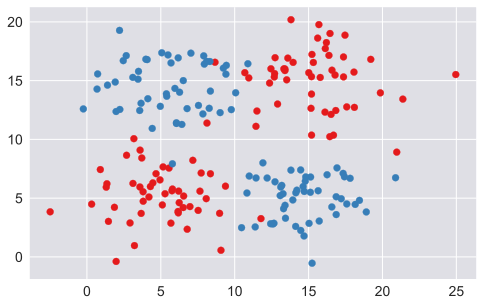

In [14]:
utils.plot2d(x, y)

### Regressão Logística

Vamos tentar resolver essa classificação com o método que aprender na última aula. Primeiro, vamos reservar um conjunto de teste.

In [447]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [448]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [449]:
ypredict = lr.predict(xtest)
accuracy_score(ytest, ypredict)

0.44

Essa acurácia pode ser considerada boa para esse problema? Por que obtivemos esse resultado?

### Fronteira de Decisão

Podemos plotar a fronteira de decisão do classificador para entender melhor o que aconteceu.

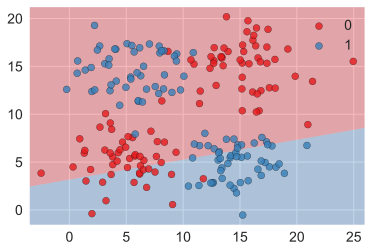

In [18]:
utils.plot2d(x, y, clf=lr)

In [1]:
# utils.plot2d(x, y, clf=lr)

## Nossa primeira árvore de decisão
... sem nem  saber o que é árvore de decisão    ¯\\_(ツ)_/¯ 

Vamos tentar implementar um modelo simples especificamente para prever instâncias desse dataset. Implemente somente o método `predict_one`. Use `x[0]` e `x[1]` para acessar cada variável da instância e tente usar somente `if-else` e operadores de comparação.

In [19]:
class UltimateComplexClassifier():
    def __init__(self):
        pass

    def fit(self):
        pass

    def predict_one(self, x):
        if (x[0]>10):
            if x[1]<10: return 1
            else: return 0
        else:
            if x[1]<10: return 0
            else: return 1


    def predict(self, x):
        return np.array([self.predict_one(xi) for xi in x])


In [20]:
ucc = UltimateComplexClassifier()
yp = ucc.predict(xtest)

accuracy_score(ytest, yp)

0.93999999999999995

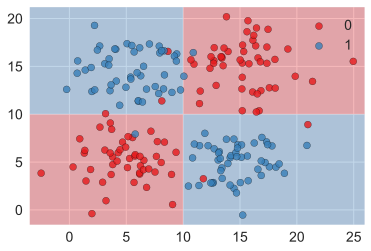

In [21]:
utils.plot2d(x, y, ucc)

Um algoritmo muito simples, porém extremamente efetivo para esse dataset! Vamos aprender a construir esses modelos de forma mais sistemática e genérica.

## Subotimalidade

### Exercício

Para esse exercício simples, vocês devem:
    
* Carregar novamente o primeiro dataset que usamos (non-linear) 
* Treinar uma árvore de decisão nos dados. Ajustem o parâmetro `depth` para um valor que você acham suficiente considerando a natureza dos dados (não é necessário train/test split aqui)
* Usem plot2d para observar a fronteira de decisão. Esse é o resultado que vocês esperavam? Por que isso aconteceu?


##  Variância

In [274]:
x, y, _ = utils.load_dataset('cancer')

In [313]:
ntrials = 20
results = pd.DataFrame(index=range(ntrials), columns=['acc_train', 'acc_test', 'lr_acc_train', 'lr_acc_test',  'tree_nodes', 'tree_depth'])
for i in range(ntrials):

    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.5)
    dt = DecisionTreeClassifier()
    dt.fit(xtrain, ytrain)

    lr = LogisticRegression()
    lr.fit(xtrain, ytrain)

    ytrain_pred = dt.predict(xtrain)
    ytest_pred = dt.predict(xtest)

    lr_ytrain_pred = lr.predict(xtrain)
    lr_ytest_pred = lr.predict(xtest)

    results.loc[i] = (accuracy_score(ytrain, ytrain_pred), 
                      accuracy_score(ytest, ytest_pred),
                      accuracy_score(ytrain, lr_ytrain_pred), 
                      accuracy_score(ytest, lr_ytest_pred),
                      dt.tree_.node_count, 
                      dt.tree_.max_depth)

results

,acc_train,acc_test,lr_acc_train,lr_acc_test,tree_nodes,tree_depth
0,1,0.936842,0.957746,0.961404,23,5
1,1,0.915789,0.964789,0.947368,27,5
2,1,0.922807,0.940141,0.957895,25,5
3,1,0.929825,0.964789,0.940351,29,8
4,1,0.915789,0.964789,0.929825,21,5
5,1,0.929825,0.961268,0.94386,29,5
6,1,0.898246,0.961268,0.933333,29,7
7,1,0.950877,0.96831,0.940351,21,5
8,1,0.912281,0.964789,0.929825,19,6
9,1,0.919298,0.975352,0.940351,21,5
